Spotify Top 100
Top 100 songs in 2018, based on Spotify streaming data, including name, artist and key attributes (danceability, energy, loudness, mode, speechiness, acousticness, etc)

(Source: Spotify)

(License: Public Domain)

Recommended Analysis

Which artists had the most Top 100 songs?

Are there more artists in the Top 100 with 'Lil' in their name, or with 'DJ' in their name?

Which song attributes are most strongly correlated? What attributes seem to have very little correlation?

Which attributes have the most variability? Which tend to be the most similar among the Top 100 songs?



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('top2018.csv')

In [3]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
df.shape

(100, 16)

In [5]:
df.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [8]:
df.describe(include='object')

,id,name,artists
count,100,100,100
unique,100,100,70
top,6DCZcSspjsKoFjzjrWoCd,God's Plan,Post Malone
freq,1,1,6


Which artists had the most Top 100 songs?


In [15]:
dm1=df.groupby('artists')['name'].count().sort_values(ascending=False).reset_index(name='Number of Songs')

In [18]:
dm1.head(5)

,artists,Number of Songs
0,Post Malone,6
1,XXXTENTACION,6
2,Drake,4
3,Ed Sheeran,3
4,Marshmello,3


Are there more artists in the Top 100 with 'Lil' in their name, or with 'DJ' in their name?

In [29]:
dm2=df[df['artists'].str.contains('Lil')]

In [30]:
dm3=df[df['artists'].str.contains('DJ')]

In [32]:
print('Number of artists with in Top 100 with Lil in their name:',len(dm2))

Number of artists with in Top 100 with Lil in their name: 3


In [33]:
print('Number of artists with in Top 100 with DJ in their name:',len(dm3))

Number of artists with in Top 100 with DJ in their name: 2


Which song attributes are most strongly correlated? What attributes seem to have very little correlation?

In [34]:
import seaborn as sns

In [35]:
corr=df.corr()

In [37]:
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782
speechiness,0.227075,-0.073591,0.019583,-0.252037,-0.150076,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856,0.235615
acousticness,-0.134374,-0.421209,0.141590,-0.269742,-0.030028,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627,-0.158935
instrumentalness,-0.066592,0.093684,-0.136607,0.036248,0.089667,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873,0.011894
liveness,-0.038761,0.050542,-0.125443,0.000006,0.024428,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942,-0.079558
valence,0.413855,0.382434,-0.032622,0.407760,-0.210599,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901,0.223410


<AxesSubplot:>

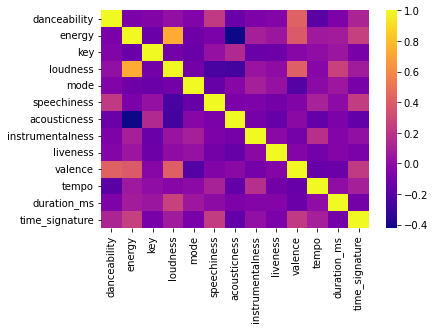

In [36]:
sns.heatmap(corr,cmap='plasma')

energy and loudeness are strongly positive corelated

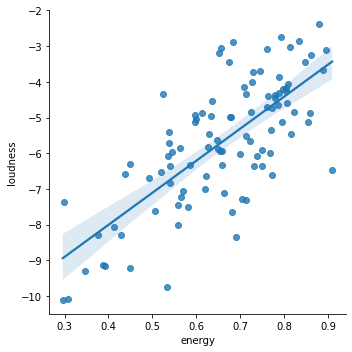

In [40]:
sns.lmplot(x='energy',y='loudness',data=df)

In [45]:
import matplotlib.pyplot as plt

Which attributes have the most variability? Which tend to be the most similar among the Top 100 songs?


In [58]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [59]:
dm4=df.iloc[:,3:13]

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

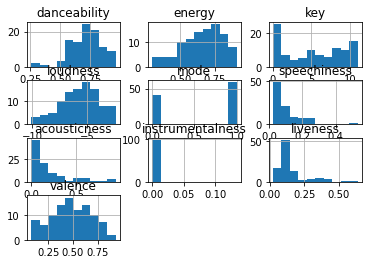

In [60]:
dm4.hist()

In [62]:
dm4.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000


mode,speechiness,acoustiness have greater variance

<AxesSubplot:>

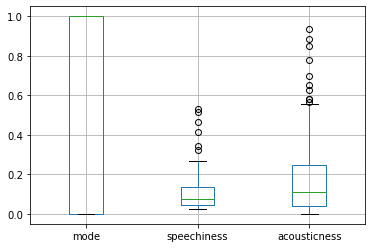

In [64]:
dm4.iloc[:,4:7].boxplot()

<AxesSubplot:>

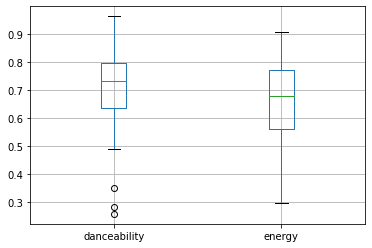

In [65]:
dm4.iloc[:,0:2].boxplot()

<AxesSubplot:>

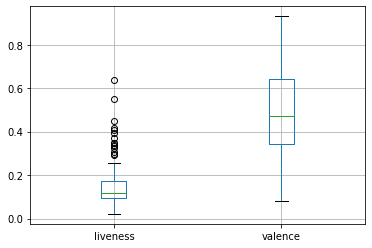

In [67]:
dm4.iloc[:,8:10].boxplot()

<AxesSubplot:xlabel='key'>

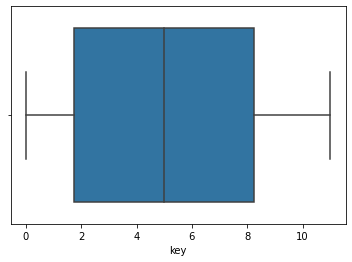

In [72]:
sns.boxplot(x='key',data=df)

<AxesSubplot:xlabel='loudness'>

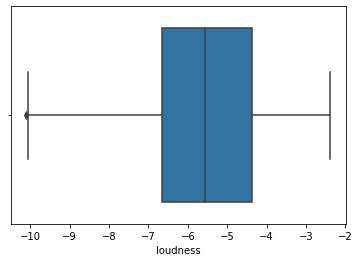

In [74]:
sns.boxplot(x='loudness',data=df)